# Setup and Context

<img src="https://i.imgur.com/gugIA5r.png" width=700>

### Introduction

Dr Ignaz Semmelweis was a Hungarian physician born in 1818 who worked in the Vienna General Hospital. In the past people thought of illness as caused by "bad air" or evil spirits. But in the 1800s Doctors started looking more at anatomy, doing autopsies and started making arguments based on data. Dr Semmelweis suspected that something was going wrong with the procedures at Vienna General Hospital. Semmelweis wanted to figure out why so many women in maternity wards were dying from childbed fever (i.e., [puerperal fever](https://en.wikipedia.org/wiki/Postpartum_infections)).

<img src=https://i.imgur.com/lSyNUwR.png width=700>

Today you will become Dr Semmelweis. This is your office 👆. You will step into Dr Semmelweis' shoes and analyse the same data collected from 1841 to 1849.

### The Data Source

Dr Semmelweis published his research in 1861. I found the scanned pages of the [full text with the original tables in German](http://www.deutschestextarchiv.de/book/show/semmelweis_kindbettfieber_1861), but an excellent [English translation can be found here](http://graphics8.nytimes.com/images/blogs/freakonomics/pdf/the%20etiology,%20concept%20and%20prophylaxis%20of%20childbed%20fever.pdf).

<img src=https://i.imgur.com/6HfLtaC.png width=500>

### Upgrade plotly (only Google Colab Notebook)

Google Colab may not be running the latest version of plotly. If you're working in Google Colab, uncomment the line below, run the cell, and restart your notebook server. 

In [230]:
# %pip install --upgrade plotly

### Import Statements

In [231]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

### Notebook Presentation

In [232]:
pd.options.display.float_format = '{:,.2f}'.format

# Create locators for ticks on the time axis


from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

### Read the Data

In [233]:
df_yearly = pd.read_csv('annual_deaths_by_clinic.csv')
# parse_dates avoids DateTime conversion later
df_monthly = pd.read_csv('monthly_deaths.csv', 
                      parse_dates=['date'])

# Preliminary Data Exploration

**Challenge**: Check out these two DataFrames ☝️. 
* What is the shape of df_yearly and df_monthly? How many rows and columns?
* What are the column names?
* Which years are included in the dataset?
* Are there any NaN values or duplicates?
* What were the average number of births that took place per month?
* What were the average number of deaths that took place per month?

In [234]:
# Number of rows and columns
print(df_yearly.shape, df_monthly.shape)
df_yearly.head()

(12, 4) (98, 3)


,year,births,deaths,clinic
0,1841,3036,237,clinic 1
1,1842,3287,518,clinic 1
2,1843,3060,274,clinic 1
3,1844,3157,260,clinic 1
4,1845,3492,241,clinic 1


In [235]:
# Name of columns
print(df_yearly.columns, df_monthly.columns)
df_monthly.head()

Index(['year', 'births', 'deaths', 'clinic'], dtype='object') Index(['date', 'births', 'deaths'], dtype='object')


,date,births,deaths
0,1841-01-01,254,37
1,1841-02-01,239,18
2,1841-03-01,277,12
3,1841-04-01,255,4
4,1841-05-01,255,2


In [236]:
# Years included in dataset
df_yearly.year.unique()

array([1841, 1842, 1843, 1844, 1845, 1846], dtype=int64)

### Check for Nan Values and Duplicates

In [237]:
# Check for duplicates
print(f"Check for duplicates. Are there duplicates in df_yearly: {df_yearly.duplicated().values.any(), df_yearly.duplicated().sum()},\nAre there any duplitaces in df_monthly: {df_monthly.duplicated().values.any(), df_monthly.duplicated().sum()}")
# Check for NaN
print(f"Check for NaN values. Are there NaN in df_yearly:{df_yearly.isnull().values.any()}, \nAre there NaN in df_monthly:{df_monthly.isnull().values.any()}")

Check for duplicates. Are there duplicates in df_yearly: (False, 0),
Are there any duplitaces in df_monthly: (False, 0)
Check for NaN values. Are there NaN in df_yearly:False, 
Are there NaN in df_monthly:False


### Descriptive Statistics

In [238]:
df_yearly.describe()

,year,births,deaths
count,12.00,12.00,12.00
mean,"1,843.50","3,152.75",223.33
std,1.78,449.08,145.38
min,"1,841.00","2,442.00",66.00
25%,"1,842.00","2,901.75",100.25
50%,"1,843.50","3,108.50",219.50
75%,"1,845.00","3,338.25",263.50
max,"1,846.00","4,010.00",518.00


In [239]:
df_monthly[["births", "deaths"]].describe()
#note Average 267 births and 22.47 deaths per month

,births,deaths
count,98.00,98.00
mean,267.00,22.47
std,41.77,18.14
min,190.00,0.00
25%,242.50,8.00
50%,264.00,16.50
75%,292.75,36.75
max,406.00,75.00


In [240]:
# Average number of briths per month
df_monthly["year_month"] = df_monthly["date"].dt.to_period('M')

df_monthly.groupby("year_month", as_index=False).births.mean()

,year_month,births
0,1841-01,254.00
1,1841-02,239.00
2,1841-03,277.00
3,1841-04,255.00
4,1841-05,255.00
...,...,...
93,1848-11,310.00
94,1848-12,373.00
95,1849-01,403.00
96,1849-02,389.00


In [241]:
# Avg death rate per month
df_monthly.groupby("year_month", as_index=False).deaths.mean().sample(10)

,year_month,deaths
31,1843-09,5.00
41,1844-07,9.00
91,1848-09,3.00
44,1844-10,8.00
94,1848-12,5.00
80,1847-10,11.00
2,1841-03,12.00
53,1845-07,15.00
16,1842-06,18.00
92,1848-10,7.00


### Percentage of Women Dying in Childbirth

**Challenge**: How dangerous was childbirth in the 1840s in Vienna? 

* Using the annual data, calculate the percentage of women giving birth who died throughout the 1840s at the hospital.


In comparison, the United States recorded 18.5 maternal deaths per 100,000 or 0.018% in 2013 [(source).](
https://en.wikipedia.org/wiki/Maternal_death#:~:text=The%20US%20has%20the%20%22highest,17.8%20per%20100%2C000%20in%202009)

In [242]:
# Precentage of Women dying in the 1840s
prob = df_yearly.deaths.sum() / df_yearly.births.sum() * 100
print(f'Chances of dying in the 1840s in Vienna: {prob:.3}%')

#note Childbirth was very risky! About 7.08% of women died 💀 in the 1840s (compared to 0.018% in the US in 2013).
#note of tutor: If someone gave me a bag of 100 M&Ms and told me that 7 of them would kill me, I'd (probably) pass on those M&Ms 🤭. Just saying.

Chances of dying in the 1840s in Vienna: 7.08%


# Visualise the Total Number of Births 🤱 and Deaths 💀 over Time

### Plot the Monthly Data on Twin Axes

**Challenge**: Create a [Matplotlib chart](https://matplotlib.org/3.3.2/api/_as_gen/matplotlib.pyplot.plot.html) with twin y-axes. It should look something like this:

<img src=https://i.imgur.com/F9DOJxx.png width=700>

* Format the x-axis using locators for the years and months (Hint: we did this in the Google Trends notebook)
* Set the range on the x-axis so that the chart lines touch the y-axes
* Add gridlines
* Use `skyblue` and `crimson` for the line colours
* Use a dashed line style for the number of deaths
* Change the line thickness to 3 and 2 for the births and deaths respectively. 
* Do you notice anything in the late 1840s?

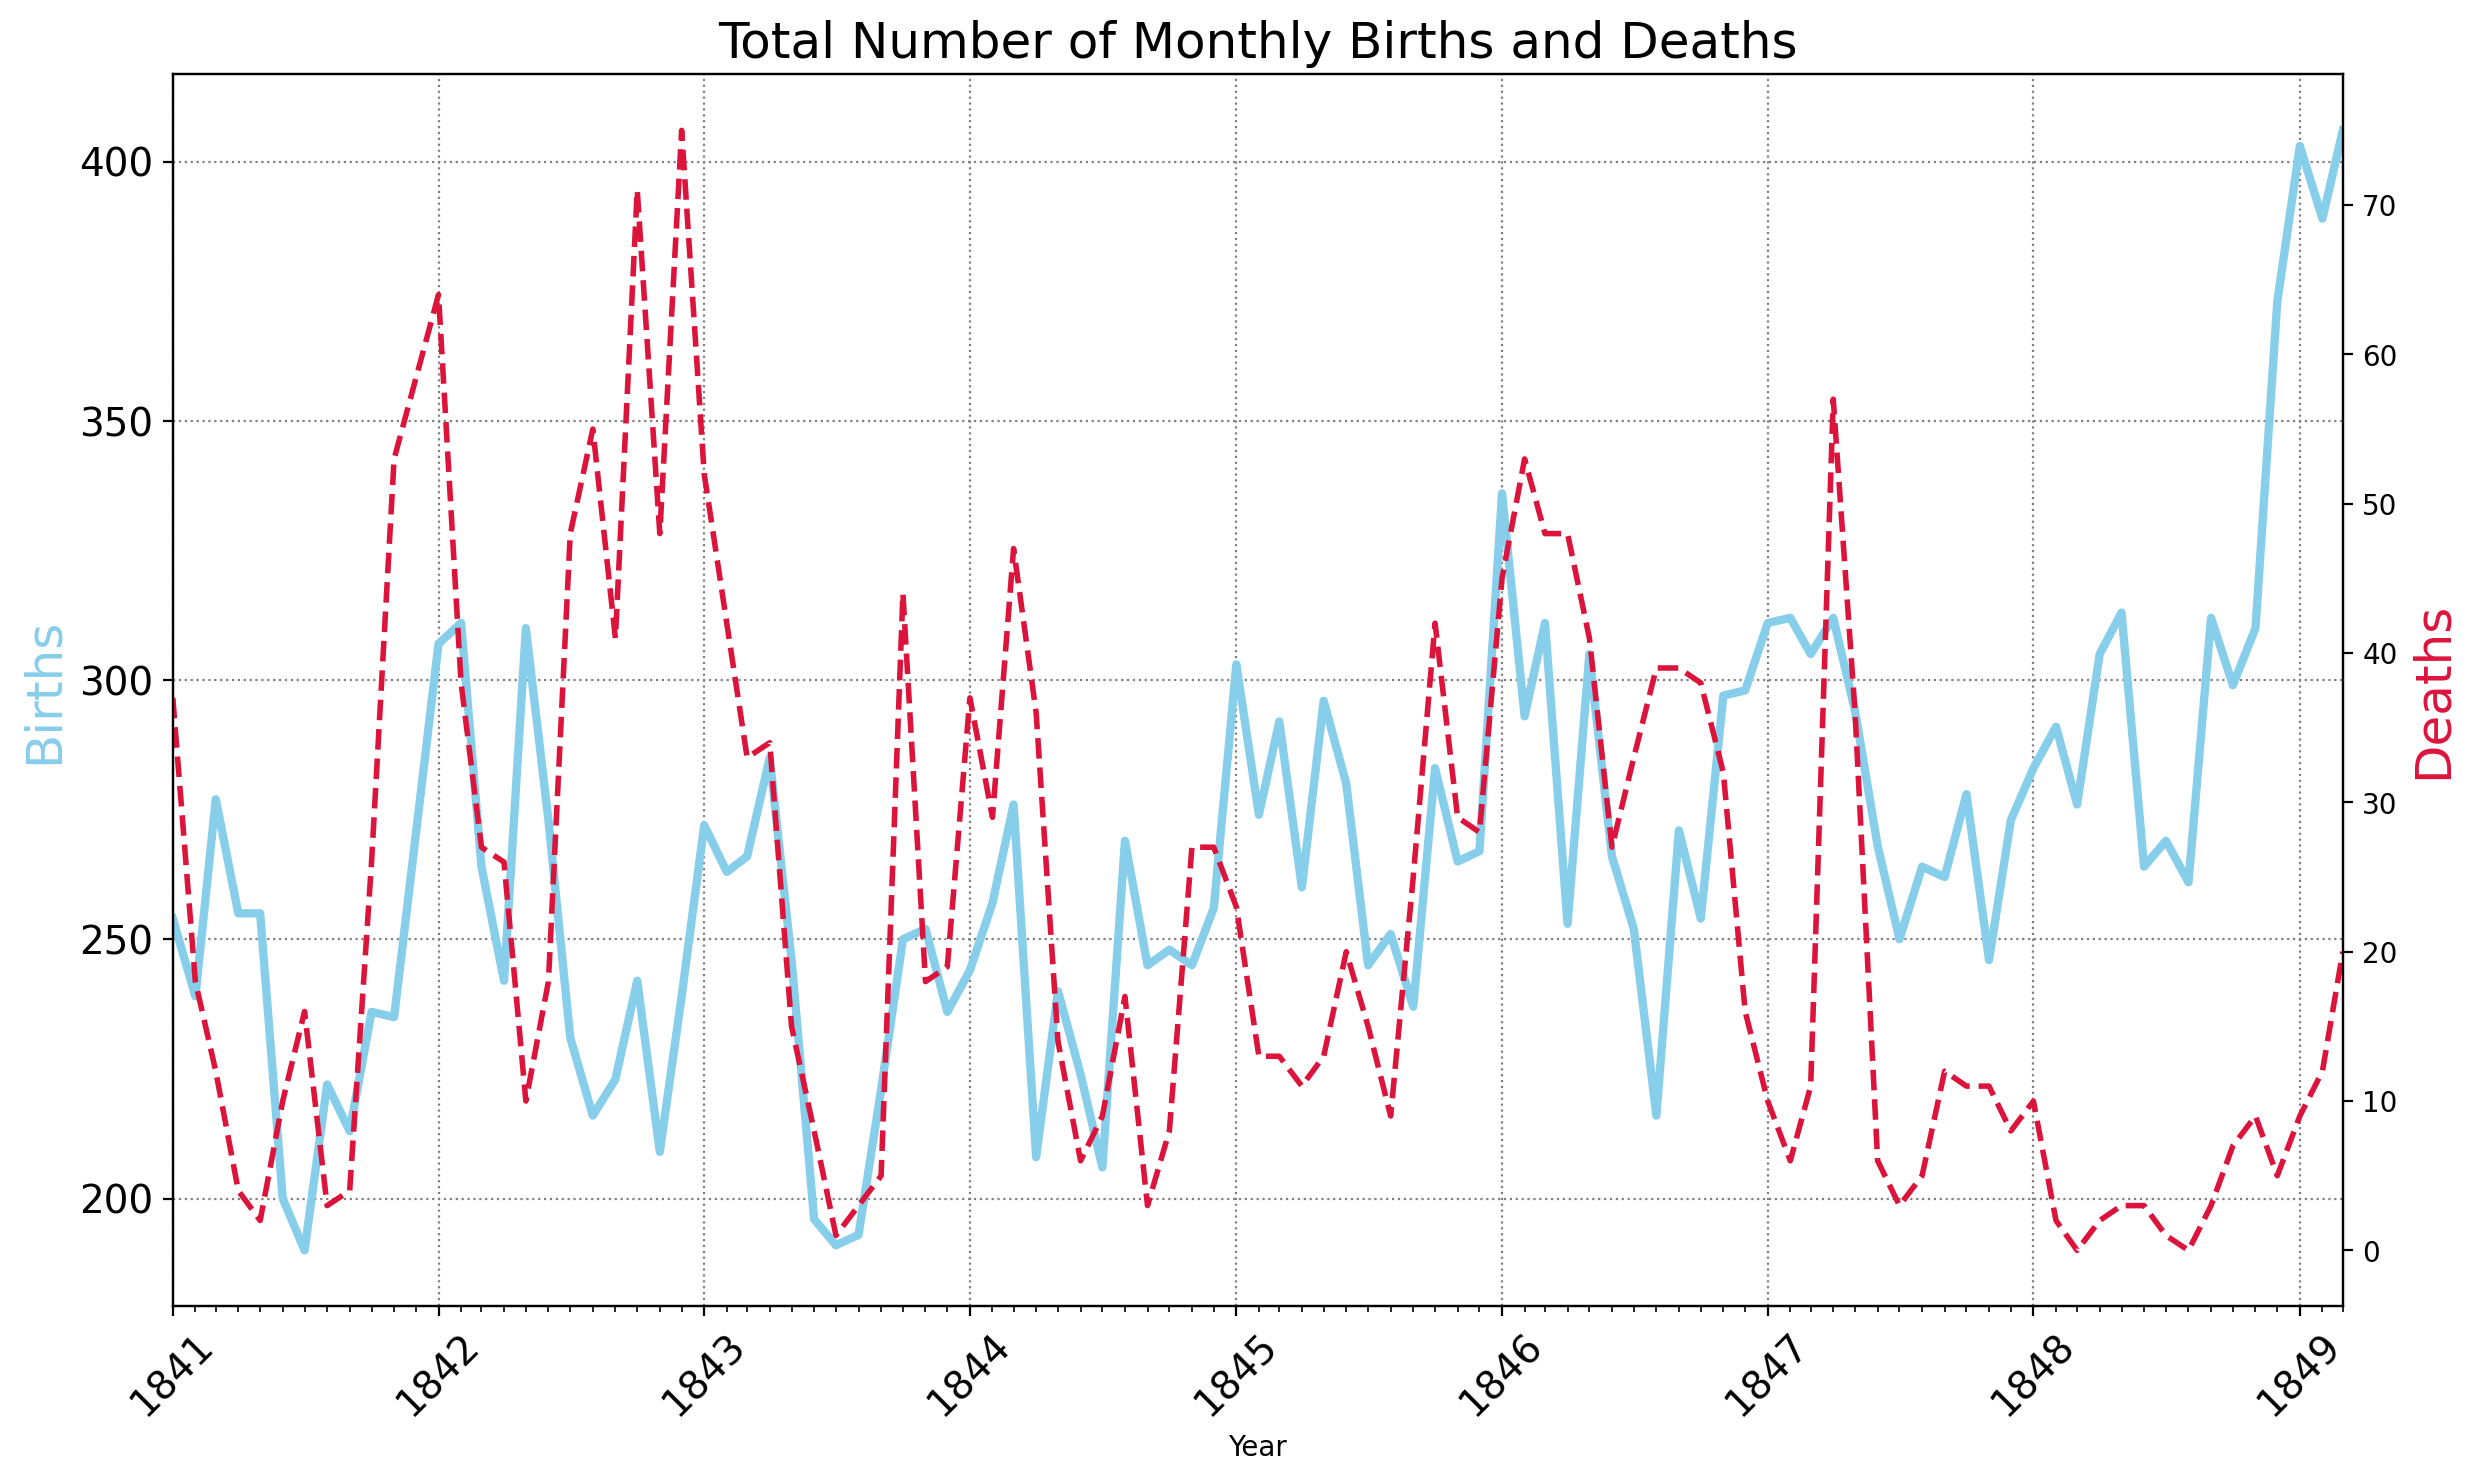

In [243]:
# Create locators for ticks on the time axis
years = mdates.YearLocator()
months = mdates.MonthLocator()
years_fmt = mdates.DateFormatter('%Y')

# Size and resolutions of the chart
plt.figure(figsize=(14,8), dpi=200)
plt.title("Total Number of Monthly Births and Deaths", fontsize= 18)

# Increase size and rotate the labels on the x-axis and ticks on both axis
plt.xticks(rotation=45, fontsize=14)
plt.yticks(fontsize=14)

# 2 axes
ax1 = plt.gca() # current axes
ax2 = ax1.twinx() # second axes that shares the same x-axis

# Set labels
ax1.set_ylabel("Births", color='skyblue', fontsize=18)
ax2.set_ylabel("Deaths", color='crimson', fontsize=18)
ax1.set_xlabel("Year")

# Show the grid lines as dark grey lines
ax1.grid(color='grey', linestyle=':')

# format the ticks
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)

# Set minimum and maximum on axes
# ax1.set_ylim([df_monthly["births"].min(),df_monthly["births"].max()])
# ax2.set_ylim([df_monthly["deaths"].min(),df_monthly["deaths"].max()])
ax1.set_xlim([df_monthly["date"].min(),df_monthly["date"].max()])

# Plot chart
ax1.plot(df_monthly["date"], df_monthly["births"], color="skyblue", linewidth = 3)
ax2.plot(df_monthly["date"], df_monthly["deaths"], color="crimson", linewidth = 2, linestyle="--")

# Display charts
plt.show() 

What we see is that something happened after 1847. The total number of deaths seems to have dropped, despite an increasing number of births! 🤔

# The Yearly Data Split by Clinic

Now let's look at the annual data instead. 

**Challenge**: Use plotly to create line charts of the births and deaths of the two different clinics at the Vienna General Hospital. 
* Which clinic is bigger or more busy judging by the number of births?
* Has the hospital had more patients over time? 
* What was the highest number of deaths recorded in clinic 1 and clinic 2?

In [244]:
df_yearly.describe()

,year,births,deaths
count,12.00,12.00,12.00
mean,"1,843.50","3,152.75",223.33
std,1.78,449.08,145.38
min,"1,841.00","2,442.00",66.00
25%,"1,842.00","2,901.75",100.25
50%,"1,843.50","3,108.50",219.50
75%,"1,845.00","3,338.25",263.50
max,"1,846.00","4,010.00",518.00


In [245]:
# Lines with births over time in each clinic
line = px.line(
    df_yearly,
    x="year",
    y="births",
    title="Total Year Births per Clinic",
    color="clinic",
)

line.update_layout(
    xaxis_title = "Year",
    yaxis_title = "Number of Births",
    legend_title = "Clinic")

line.show()

#note We see that more and more women gave birth at the hospital over the years. Clinic 1, which was staffed by male doctors and medical students was also the busier or simply the larger ward. More births took place in clinic 1 than in clinic 2.

In [246]:
# Lines with deaths over time in each clinic
line = px.line(
    df_yearly,
    x="year",
    y="deaths",
    title="Total Year Deaths per Clinic",
    color="clinic",
)

line.update_layout(
    xaxis_title = "Year",
    yaxis_title = "Number of Deaths",
    legend_title = "Clinic")

line.show()

#note We also see that, not only were more people born in clinic 1, more people also died in clinic 1.

In [247]:
# Max number of deaths and births per clinic
df_yearly.groupby("clinic")[["births", "deaths"]].max()

,births,deaths
clinic,,
clinic 1,4010,518
clinic 2,3754,202


### Calculate the Proportion of Deaths at Each Clinic

**Challenge**: Calculate the proportion of maternal deaths per clinic. That way we can compare like with like. 
* Work out the percentage of deaths for each row in the `df_yearly` DataFrame by adding a column called "pct_deaths". 
* Calculate the average maternal death rate for clinic 1 and clinic 2 (i.e., the total number of deaths per the total number of births).
* Create another plotly line chart to see how the percentage varies year over year with the two different clinics.
* Which clinic has a higher proportion of deaths?
* What is the highest monthly death rate in clinic 1 compared to clinic 2?

In [248]:
# Proportion of deaths per year
df_yearly["proportion_of_death"] = df_yearly.deaths / df_yearly.births * 100
df_yearly["proportion_of_death"]

0     7.81
1    15.76
2     8.95
3     8.24
4     6.90
5    11.45
6     3.52
7     7.60
8     5.99
9     2.30
10    2.04
11    2.80
Name: proportion_of_death, dtype: float64

In [249]:
# The average death rate for the entire time period for clinic 1
clinic_1 = df_yearly[df_yearly.clinic == 'clinic 1']
avg_c1 = clinic_1.deaths.sum() / clinic_1.births.sum() * 100
print(f'Average death rate in clinic 1 is {avg_c1:.3}%.') 

Average death rate in clinic 1 is 9.92%.


In [250]:
# The average death rate for the entire time period for clinic 2
clinic_2 = df_yearly[df_yearly.clinic == 'clinic 2']
avg_c2 = clinic_2.deaths.sum() / clinic_2.births.sum() * 100
print(f'Average death rate in clinic 2 is {avg_c2:.3}%.')


Average death rate in clinic 2 is 3.88%.


Clinic 2 had a consistently lower death rate than clinic 1! This is what puzzled and frustrated Dr Semmelweis.

### Plotting the Proportion of Yearly Deaths by Clinic

In [251]:
# Creating plotly line
line = px.line(
    df_yearly,
    x="year",
    y="proportion_of_death",
    title="Proportion of Yearly Deaths by Clinic",
    color="clinic",)

line.update_layout(
    xaxis_title = "Year",
    yaxis_title = "Proportion of Yearly Deaths",
    legend_title = "Clinic")

line.show()

#note 1842 was a rough year. About 16% of women died in clinic 1 and about 7.6% of women died in clinic 2.

# The Effect of Handwashing

Dr Semmelweis made handwashing obligatory in the summer of 1947. In fact, he ordered people to wash their hands with clorine (instead of water).

In [252]:
# Date when handwashing was made mandatory
handwashing_start = pd.to_datetime('1847-06-01')

**Challenge**: 
* Add a column called "pct_deaths" to `df_monthly` that has the percentage of deaths per birth for each row. 
* Create two subsets from the `df_monthly` data: before and after Dr Semmelweis ordered washing hand.
* Calculate the average death rate prior to June 1947.
* Calculate the average death rate after June 1947.

In [253]:
df_monthly["pct_deaths"] = df_monthly.deaths / df_monthly.births * 100

before_washing = df_monthly[df_monthly.date < handwashing_start]
after_washing = df_monthly[df_monthly.date >= handwashing_start]


bw_rate = before_washing.deaths.sum() / before_washing.births.sum() * 100
aw_rate = after_washing.deaths.sum() / after_washing.births.sum() * 100
print(f'Average death rate before 1847 was {bw_rate:.4}%')
print(f'Average death rate AFTER 1847 was {aw_rate:.3}%')


Average death rate before 1847 was 10.53%
Average death rate AFTER 1847 was 2.15%


### Calculate a Rolling Average of the Death Rate

**Challenge**: Create a DataFrame that has the 6 month rolling average death rate prior to mandatory handwashing.

*Hint*: You'll need to set the dates as the index in order to avoid the date column being dropped during the calculation.

In [254]:
# Need to drop period column year_month first and then to set roll_df date as index
roll_df = before_washing.drop(columns=['year_month']).set_index('date')

roll_df = roll_df.rolling(window=6).mean()

roll_df




,births,deaths,pct_deaths
date,,,
1841-01-01,NaN,NaN,NaN
1841-02-01,NaN,NaN,NaN
1841-03-01,NaN,NaN,NaN
1841-04-01,NaN,NaN,NaN
1841-05-01,NaN,NaN,NaN
...,...,...,...
1847-01-01,274.50,29.00,11.13
1847-02-01,290.50,23.50,8.44
1847-03-01,296.17,18.83,6.64


### Highlighting Subsections of a Line Chart

**Challenge**: Copy-paste and then modify the Matplotlib chart from before to plot the monthly death rates (instead of the total number of births and deaths). The chart should look something like this:

<img src=https://i.imgur.com/X6TQe0R.png width=500>

* Add 3 seperate lines to the plot: the death rate before handwashing, after handwashing, and the 6-month moving average before handwashing.
* Show the monthly death rate before handwashing as a thin dashed black line. 
* Show the moving average as a thicker, crimon line.
* Show the rate after handwashing as a skyblue line with round markers. 
* Look at the [code snippet in the documentation to see how you can add a legend](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.legend.html) to the chart.

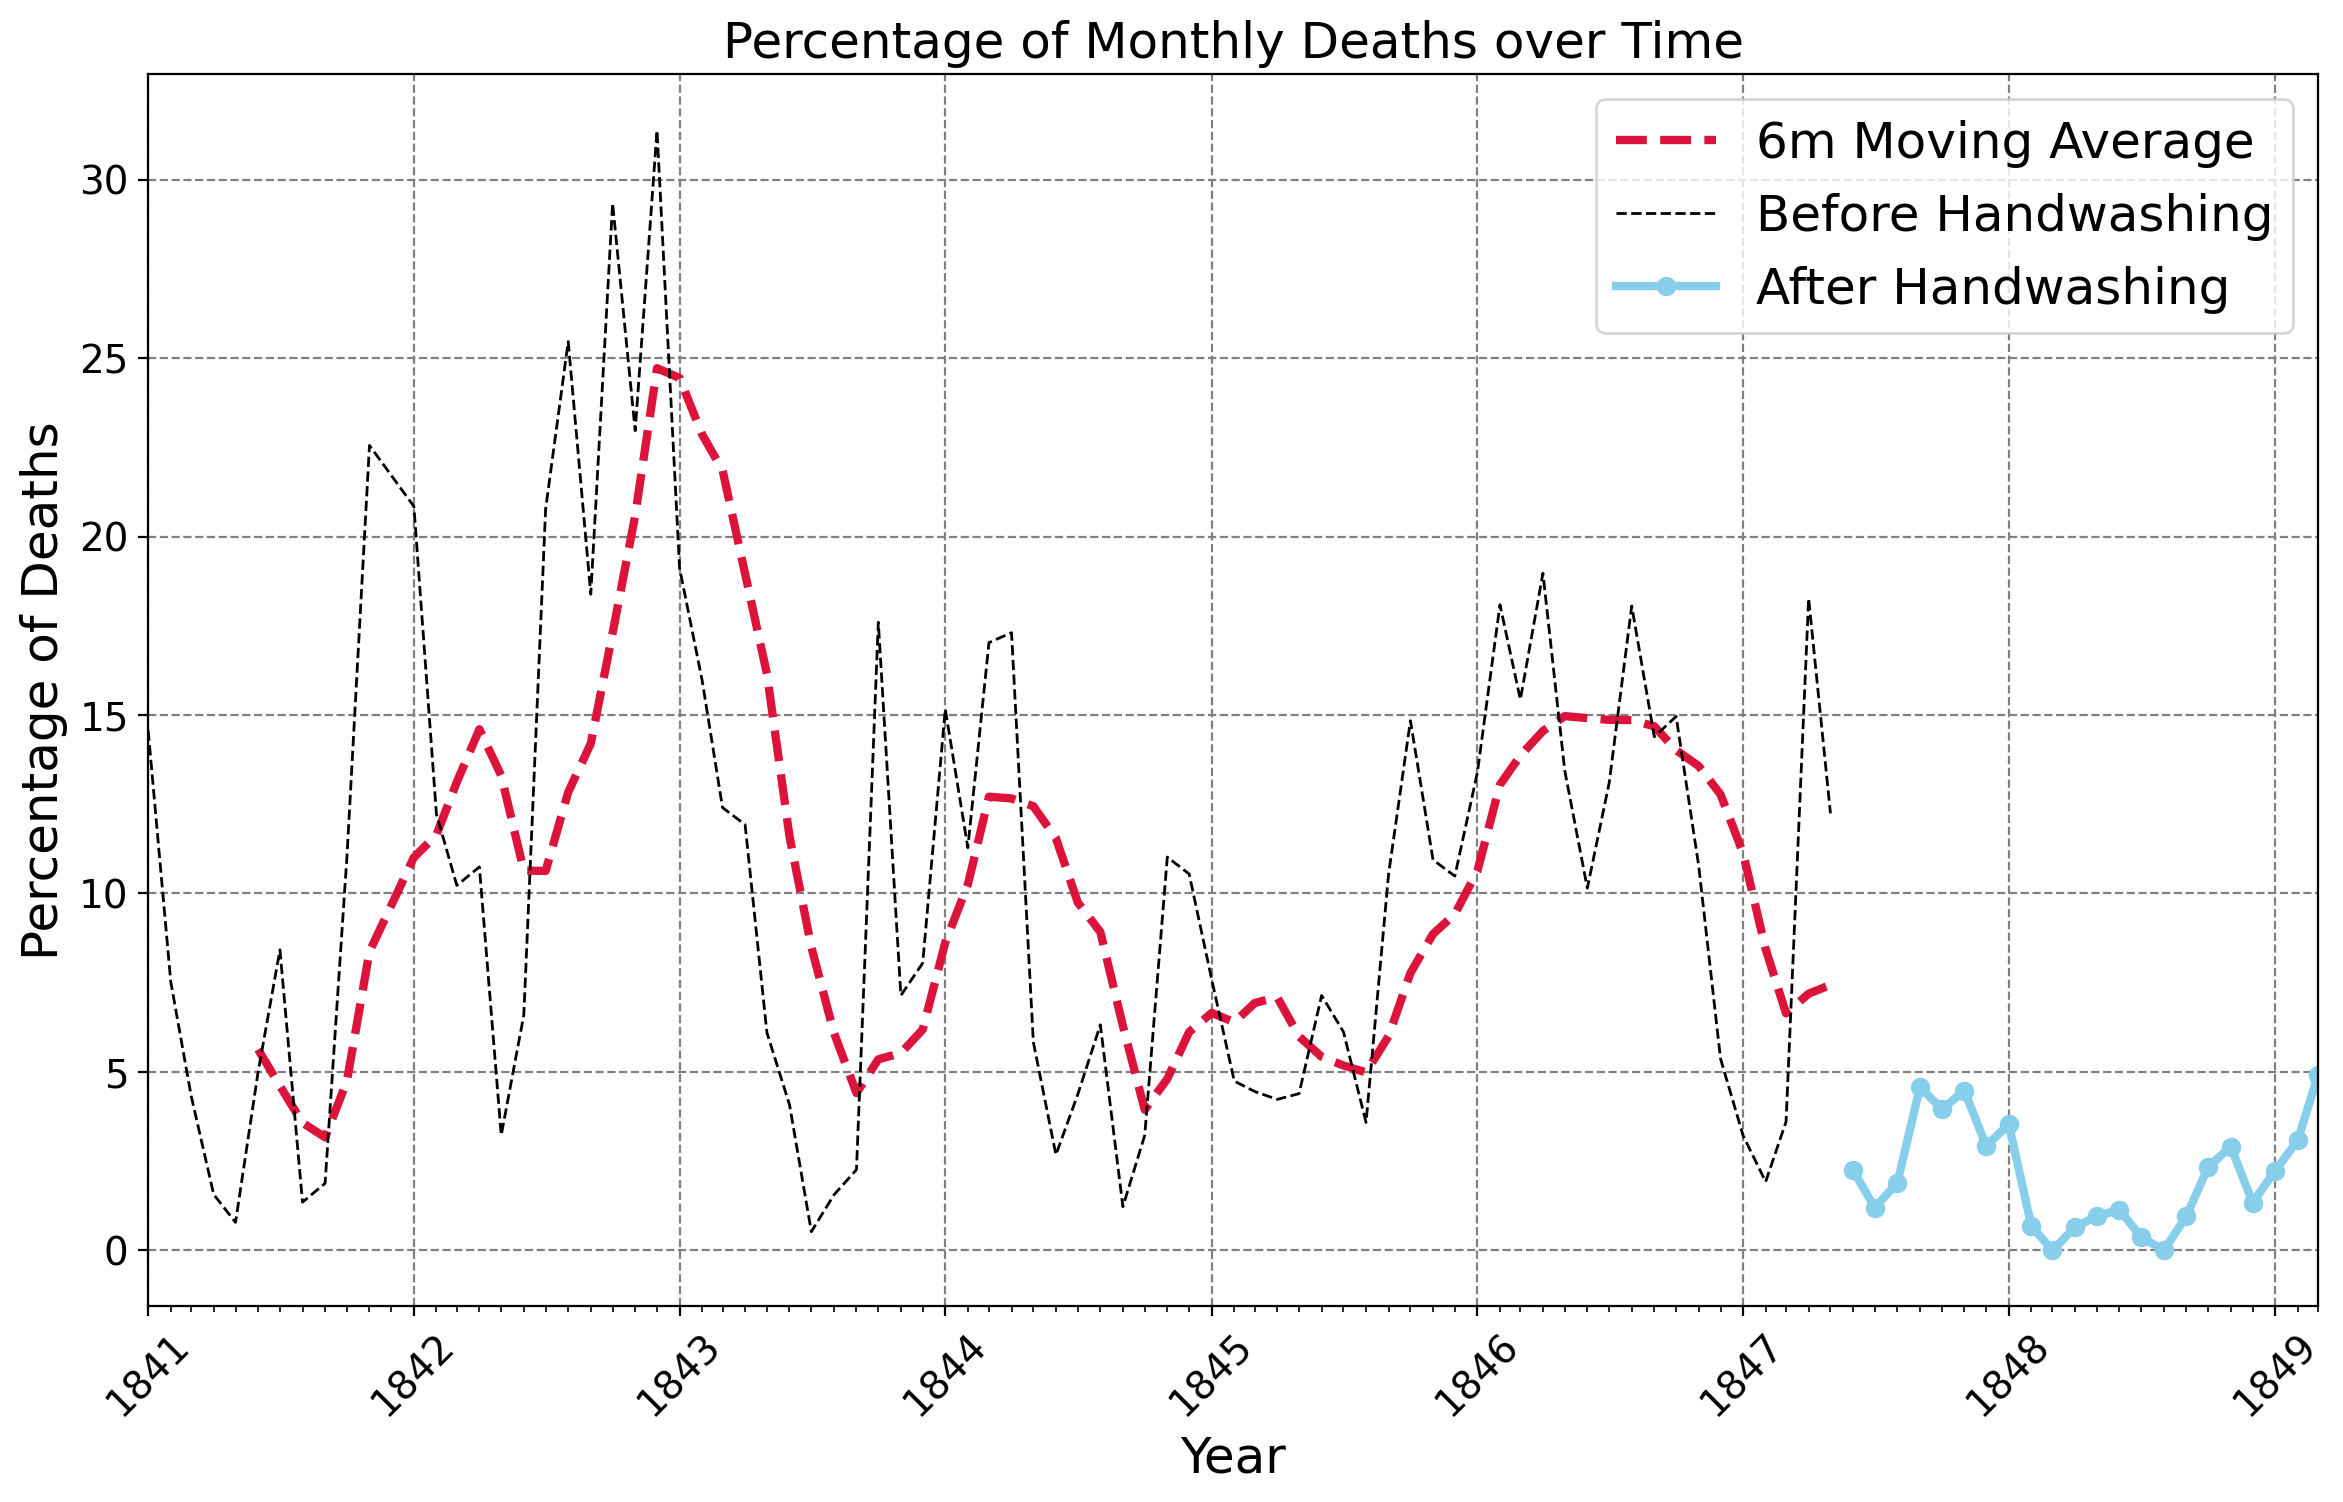

In [255]:
plt.figure(figsize=(14,8), dpi=200)
plt.title('Percentage of Monthly Deaths over Time', fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14, rotation=45)
 
plt.ylabel('Percentage of Deaths', fontsize=18)
plt.xlabel('Year', fontsize=18)
 
ax = plt.gca()
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(years_fmt)
ax.xaxis.set_minor_locator(months)
ax.set_xlim([df_monthly.date.min(), df_monthly.date.max()])
 
plt.grid(color='grey', linestyle='--')
 
ma_line, = plt.plot(roll_df.index, 
                    roll_df.pct_deaths, 
                    color='crimson', 
                    linewidth=3, 
                    linestyle='--',
                    label='6m Moving Average')
bw_line, = plt.plot(before_washing.date, 
                    before_washing.pct_deaths,
                    color='black', 
                    linewidth=1, 
                    linestyle='--', 
                    label='Before Handwashing')
aw_line, = plt.plot(after_washing.date, 
                    after_washing.pct_deaths, 
                    color='skyblue', 
                    linewidth=3, 
                    marker='o',
                    label='After Handwashing')
 
plt.legend(handles=[ma_line, bw_line, aw_line],
           fontsize=18)
 
plt.show()

### Statistics - Calculate the Difference in the Average Monthly Death Rate

**Challenge**:
* What was the average percentage of monthly deaths before handwashing? 
* What was the average percentage of monthly deaths after handwashing was made obligatory?
* By how much did handwashing reduce the average chance of dying in childbirth in percentage terms?
* How do these numbers compare to the average for all the 1840s that we calculated earlier? 
* How many times lower are the chances of dying after handwashing compared to before?

In [256]:
# Avg deaths before handwashing
avg_prob_before = before_washing.pct_deaths.mean()
print(f'Chance of death during childbirth before handwashing: {avg_prob_before:.4}%.')

# Avg deaths after handwashing
avg_prob_after = after_washing.pct_deaths.mean()
print(f'Chance of death during childbirth after handwashing: {avg_prob_after:.3}%.')

#note We see that the average death rate before handwashing was 10.5%. After handwashing was made obligatory, the average death rate was 2.11%. The difference is massive. Handwashing decreased the average death rate by 8.4%, a 5x improvement. 😮

Chance of death during childbirth before handwashing: 10.5%.
Chance of death during childbirth after handwashing: 2.11%.


### Use Box Plots to Show How the Death Rate Changed Before and After Handwashing

**Challenge**: 
* Use [NumPy's `.where()` function](https://numpy.org/doc/stable/reference/generated/numpy.where.html) to add a column to `df_monthly` that shows if a particular date was before or after the start of handwashing. 
* Then use plotly to create box plot of the data before and after handwashing. 
* How did key statistics like the mean, max, min, 1st and 3rd quartile changed as a result of the new policy?



In [257]:
# Adding column to `df_monthly`
df_monthly['washing_hands'] = np.where(df_monthly.date < handwashing_start, 'No', 'Yes')

df_monthly.sample(5)

,date,births,deaths,year_month,pct_deaths,washing_hands
89,1848-07-01,269,1,1848-07,0.37,Yes
32,1843-10-01,250,44,1843-10,17.60,No
35,1844-01-01,244,37,1844-01,15.16,No
79,1847-09-01,262,12,1847-09,4.58,Yes
37,1844-03-01,276,47,1844-03,17.03,No


In [258]:
# Creating box plot with plotly
box = px.box(
    df_monthly,
    x="washing_hands",
    y="pct_deaths",
    color="washing_hands",
    title="How Have Stats Changed with Handwashing Policy"
    )

box.update_layout(
    xaxis_title = "Handwashing Policy",
    yaxis_title = "Percentage of Monthly Deaths",
    legend_title = "Handwashing Policy")

box.show()

Here we also see the massive spike in deaths in late 1842 (MAX value of blue box plot). Over 30% of women who gave birth that month died in hospital. What we also see in the box plot is how not only did the average death rate come down, but so did the overall range - we have a lower max and 3rd quartile too. Let's take a look at a histogram to get a better sense of the distribution.

### Use Histograms to Visualise the Monthly Distribution of Outcomes

**Challenge**: Create a [plotly histogram](https://plotly.com/python/histograms/) to show the monthly percentage of deaths. 

* Use docs to check out the available parameters. Use the [`color` parameter](https://plotly.github.io/plotly.py-docs/generated/plotly.express.histogram.html) to display two overlapping histograms.
* The time period of handwashing is shorter than not handwashing. Change `histnorm` to `percent` to make the time periods comparable. 
* Make the histograms slighlty transparent
* Experiment with the number of bins on the histogram. Which number work well in communicating the range of outcomes?
* Just for fun, display your box plot on the top of the histogram using the `marginal` parameter. 

In [259]:
# Creating histogram
hist = px.histogram(df_monthly, 
                   x='pct_deaths', 
                   color='washing_hands',
                   nbins=30,
                   opacity=0.6,
                   barmode='overlay',
                   histnorm='percent',
                   marginal='box',)
 
hist.update_layout(xaxis_title='Proportion of Monthly Deaths in %',
                   yaxis_title='Count',)
 
hist.show()

#TODO What is this y column for? Count of what?

### Use a Kernel Density Estimate (KDE) to visualise a smooth distribution

**Challenge**: Use [Seaborn's `.kdeplot()`](https://seaborn.pydata.org/generated/seaborn.kdeplot.html) to create two kernel density estimates of the `pct_deaths`, one for before handwashing and one for after. 

* Use the `shade` parameter to give your two distributions different colours. 
* What weakness in the chart do you see when you just use the default parameters?
* Use the `clip` parameter to address the problem. 


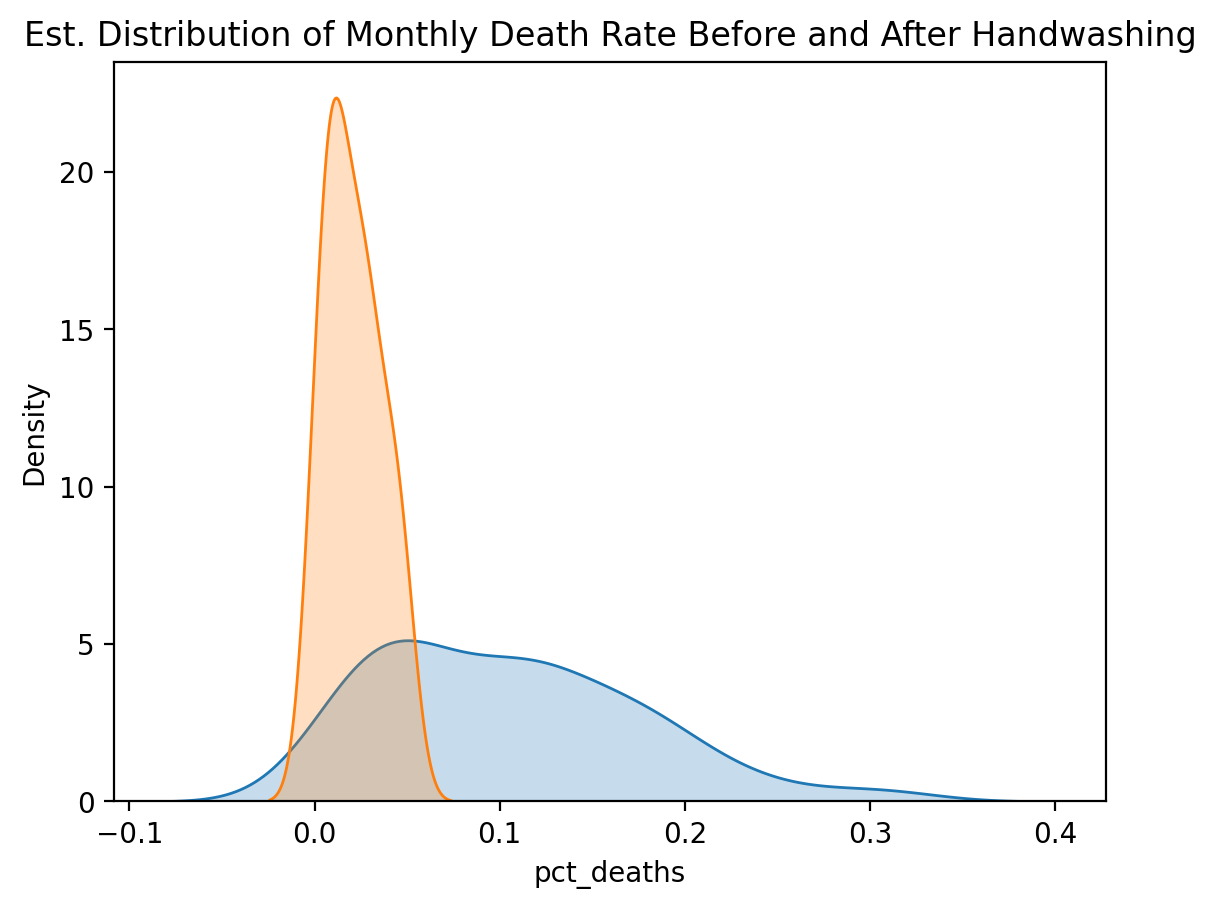

In [268]:
plt.figure(dpi=200)

# By default the distribution estimate includes a negative death rate!
#! Use fill instead shade
sns.kdeplot(before_washing.pct_deaths/100, fill=True)
sns.kdeplot(after_washing.pct_deaths/100, fill=True)

plt.title('Est. Distribution of Monthly Death Rate Before and After Handwashing')
plt.show()

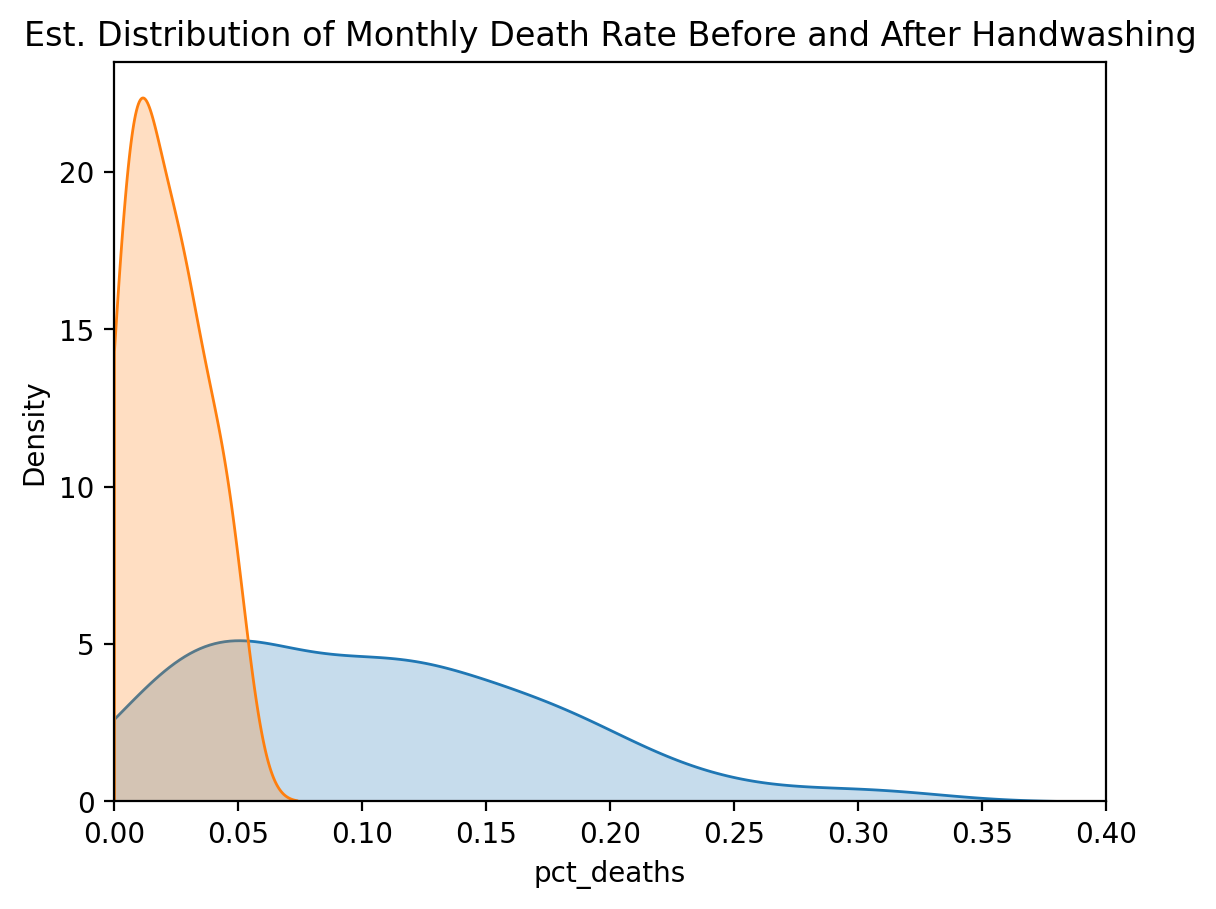

In [267]:
plt.figure(dpi=200)
sns.kdeplot(before_washing.pct_deaths/100, 
            fill=True,
            clip=(0,1))
sns.kdeplot(after_washing.pct_deaths/100, 
            fill=True,
            clip=(0,1))
plt.title('Est. Distribution of Monthly Death Rate Before and After Handwashing')
plt.xlim(0, 0.40)
plt.show()

### Use a T-Test to Show Statistical Significance

**Challenge**: Use a t-test to determine if the differences in the means are statistically significant or purely due to chance. 

If the p-value is less than 1% then we can be 99% certain that handwashing has made a difference to the average monthly death rate. 

* Import `stats` from scipy
* Use the [`.ttest_ind()` function](https://docs.scipy.org/]doc/scipy/reference/generated/scipy.stats.ttest_ind.html) to calculate the t-statistic and the p-value
* Is the difference in the average proportion of monthly deaths statistically significant at the 99% level? 



In [269]:
import scipy.stats as stats

In [273]:
t_stat, p_value = stats.ttest_ind(a=before_washing.pct_deaths/100, 
                                  b=after_washing.pct_deaths/100)
print(f'p-palue is {p_value:.10f}')
print(f't-statstic is {t_stat:.4}')

# Interpretation
alpha = 0.05  # Significance level
if p_value < alpha:
    print("Reject null hypothesis: There is a significant difference in 'pct_deaths' before and after washing hands.")
else:
    print("Fail to reject null hypothesis: There is no significant difference in 'pct_deaths' before and after washing hands.")

p-palue is 0.0000002985
t-statstic is 5.512
Reject null hypothesis: There is a significant difference in 'pct_deaths' before and after washing hands.


What do you conclude from your analysis, Doctor? 😊

<img src=https://i.imgur.com/rvjNVzQ.gif>